#### Xuechun Wang
#### STATS 507 PS5
#### 24107190

In [1]:
import pandas as pd
import numpy as np
from os.path import exists
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## Question 0 - R-Squared Warmup

In [2]:
#read in datafile
file = 'tooth_growth.feather'
if exists(file):
    tg_data = pd.read_feather(file)
else: 
    tooth_growth = sm.datasets.get_rdataset('ToothGrowth')
    tg_data = tooth_growth.data
    tg_data.to_feather(file)

In [3]:
#transform dataset and get dummy categorical variable
tg_data['log_len'] = tg_data[['len']].transform(np.log)
tg_data['dose_cat'] = pd.Categorical(tg_data['dose'])
Y = tg_data['log_len']
X = pd.get_dummies(tg_data['supp'])['OJ']

#buile linear regression model for independent variables
mod1 = sm.OLS.from_formula('Y ~ X + dose_cat', data=tg_data)
res1 = mod1.fit()
res1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.738   
Dependent Variable: Y                AIC:                10.9133 
Date:               2021-11-06 00:54 BIC:                19.2907 
No. Observations:   60               Log-Likelihood:     -1.4567 
Df Model:           3                F-statistic:        56.31   
Df Residuals:       56               Prob (F-statistic): 6.51e-17
R-squared:          0.751            Scale:              0.065853
------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept        2.1407    0.0663  32.3077  0.0000  2.0079  2.2734
dose_cat[T.1.0]  0.6819    0.0811   8.4034  0.0000  0.5194  0.8445
dose_cat[T.2.0]  0.9752    0.0811  12.0176  0.0000  0.8127  1.1378
X                0.2722    0.0663   4.1075  0.0001  0.1394  0.4049
-----------------------------------------------------------------
Omnibus:               0.725        Durbin-Watson:          1.568
Prob(Omnibus):         0.696        Jarque-Bera (JB):       0.204
Skew:                  -0.009       Prob(JB):               0.903
Kurtosis:              3.285        Condition No.:          4    
=================================================================

"""

In [4]:
#build linear regression model for interaction term
mod3 = smf.ols('Y ~ X*dose_cat', data=tg_data)
res3 = mod3.fit()
res3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.775   
Dependent Variable: Y                AIC:                3.4775  
Date:               2021-11-06 00:54 BIC:                16.0436 
No. Observations:   60               Log-Likelihood:     4.2612  
Df Model:           5                F-statistic:        41.69   
Df Residuals:       54               Prob (F-statistic): 2.34e-17
R-squared:          0.794            Scale:              0.056441
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          2.0208   0.0751 26.8989 0.0000  1.8702  2.1715
dose_cat[T.1.0]    0.7893   0.1062  7.4294 0.0000  0.5763  1.0024
dose_cat[T.2.0]    1.2273   0.1062 11.5513 0.0000  1.0143  1.4403
X                  0.5118   0.1062  4.8171 0.0000  0.2988  0.7248
X:dose_cat[T.1.0] -0.2148   0.1503 -1.4297 0.1586 -0.5161  0.0864
X:dose_cat[T.2.0] -0.5041   0.1503 -3.3551 0.0015 -0.8054 -0.2029
-----------------------------------------------------------------
Omnibus:               0.136        Durbin-Watson:          1.862
Prob(Omnibus):         0.934        Jarque-Bera (JB):       0.039
Skew:                  -0.058       Prob(JB):               0.981
Kurtosis:              2.953        Condition No.:          10   
=================================================================

"""

We applied OLS to fit a linear regression model for response variable (with transformation) and independent variables of supplement types and categroical variable, doses (model 1), and another model for interaction terms (model 2). From the summary table, we see R squared and Adjusted R are 0.751 and 0.738 for model 1 respectively, and for model 2 is 0.794 and 0.775 respectively. It indicates about 75% variation in Y is explained by the independent variables and the model 2 has a higher R-squared compared to model 1, which may suggest model 2 is more reliable in covering the variations.

## Question 1 - NHANES Dentition

##### part a

In [5]:
#read in data file
ohx = pd.read_feather("ohx.feather")
demo = pd.read_pickle("demo_updated.pickle")

In [6]:
#levels for categorical variables
demo_cat = {
    'gender': {1: 'Male', 2: 'Female'},
    'race': {1: 'Mexican American',
             2: 'Other Hispanic',
             3: 'Non-Hispanic White',
             4: 'Non-Hispanic Black',
             6: 'Non-Hispanic Asian',
             7: 'Other/Multiracial'
             },
    'education': {1: 'Less than 9th grade',
                  2: '9-11th grade (Includes 12th grade with no diploma)',
                  3: 'High school graduate/GED or equivalent',
                  4: 'Some college or AA degree',
                  5: 'College graduate or above',
                  7: 'Refused',
                  9: "Don't know"
                  },
    'martial_status': {1.0: 'Married',
                       2.0: 'Widowed',
                       3.0: 'Divorced',
                       4.0: 'Separated',
                       5.0: 'Never married',
                       6.0: 'Living with partner',
                       77.0: 'Refused',
                       99.0: "Don't know"
                       },
    'exam_status': {1.0: 'Interviewed only',
                    2.0: 'Both interviewed and MEC examined'
                    }
    }

In [7]:
#replace dataset
demo = demo.replace(demo_cat)

In [8]:
#merge and clean dataset
result = pd.merge(ohx, demo, on = "id", how = "left")
result['tc_07'] = result['tc_07'].dropna()
X = result['age']

In [9]:
#get dummy for all the categorical variables
tc = ['tc_' + str(i).zfill(2) for i in range(1,33)]
response = ['y_' + str(i).zfill(2) for i in range(1,33)]
y = {column: None for column in response}
for i in range(32):
    y.update({response[i]: 1 * (result[tc[i]] == "Permanent tooth present")})
df = pd.DataFrame(y).reset_index()
df = pd.concat([df, result], axis = 1)
table = df.groupby('age')['y_07'].mean().reset_index(name = "probability")

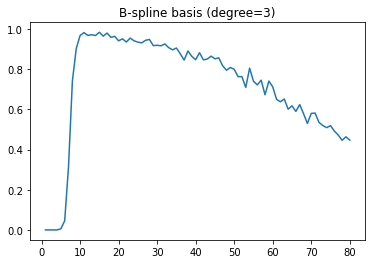

In [10]:
#plot the graph for the selected tooth
plt.title("B-spline basis (degree=3)")
plt.plot(table['age'], table['probability'])

In [13]:
#use knots to generate bspline and use aic to diagonoise it
Y = df['y_07']
knots1 = (12, 13, 40, 60)
knots2 = (11, 15, 23, 35)
knots3 = (9, 10, 12, 15)
teeth_mod = smf.logit(
    'Y~bs(age, knots=knots3, degree=3)+gender+'+'race', data=df)
fit_result = teeth_mod.fit()
fit_result.aic

Optimization terminated successfully.
         Current function value: 0.356174
         Iterations 15


25607.701039428008

knots3 has the best performance, therefore, in this case, we apply knot3 to fit the data.

##### part b

In [16]:
#select all the tooth variables
result_age = df.loc[:,'age']
tclist = df.loc[:, 'y_01':'y_32']
tclist = pd.concat([result_age, tclist], axis = 1)

In [34]:
#apply logistic regression on all the teeth variables
temp_list = []
for i in range(1, 33):
    knots3 = (9, 10, 12, 15)
    y_ = response[i-1]
    reg = smf.logit(y_+'~bs(age, knots=knots3, degree=3)', data=tclist)
    fit = reg.fit(method='bfgs')
    temp_list.append((reg, fit))
    num = str(i).zfill(2)
    yhat = 'yhat_'+ num
    tclist[yhat] = reg.predict(fit.params)

         Current function value: 0.339186
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.396396
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.398605
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.392894
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.431537
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.350891
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.365029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.356322
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.354766
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.364394
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.348780
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.432957
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.392107
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.401373
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.397665
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.341957
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.371828
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.410318
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.425665
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.374756
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.378141
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.302857
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.317801
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.321433
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.322027
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.320060
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.303706
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.381005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.375211
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.422766
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.408393
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


         Current function value: 0.376478
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [36]:
#group by the dataset based on age factor
tc_prob = tclist.groupby('age').mean().reset_index()
tc_prob

,age,y_01,y_02,y_03,y_04,y_05,y_06,y_07,y_08,y_09,...,yhat_23,yhat_24,yhat_25,yhat_26,yhat_27,yhat_28,yhat_29,yhat_30,yhat_31,yhat_32
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.136869,0.123900,0.120572,0.134355,0.072784,0.084897,0.078867,0.128969,0.058400,0.005070
1,2,0.000000,0.000000,0.000943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017710,0.023156,0.021966,0.017257,0.009873,0.013787,0.015628,0.026563,0.013298,0.001258
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008054,0.017742,0.016751,0.007874,0.002704,0.004084,0.005098,0.018896,0.004650,0.000423
3,4,0.000000,0.000000,0.011043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011123,0.042539,0.040610,0.010977,0.001478,0.002238,0.002770,0.037641,0.002508,0.000184
4,5,0.000000,0.000000,0.144022,0.000000,0.000000,0.000000,0.005435,0.040761,0.032609,...,0.035893,0.200343,0.195927,0.035873,0.001523,0.002187,0.002434,0.146553,0.002040,0.000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0.094972,0.363128,0.351955,0.446927,0.435754,0.553073,0.491620,0.502793,0.508380,...,0.643390,0.658954,0.653354,0.641001,0.707261,0.591587,0.491424,0.353443,0.345067,0.121935
76,77,0.080745,0.304348,0.322981,0.391304,0.372671,0.496894,0.472050,0.503106,0.490683,...,0.636191,0.654674,0.648504,0.633393,0.697022,0.581153,0.482428,0.350347,0.336303,0.122056
77,78,0.036145,0.295181,0.361446,0.361446,0.409639,0.530120,0.445783,0.493976,0.506024,...,0.629028,0.650567,0.643809,0.625783,0.686292,0.570345,0.473531,0.347395,0.327656,0.122771
78,79,0.093960,0.322148,0.369128,0.362416,0.422819,0.483221,0.463087,0.489933,0.469799,...,0.621900,0.646632,0.639268,0.618170,0.675051,0.559151,0.464732,0.344571,0.319122,0.124117


##### part c

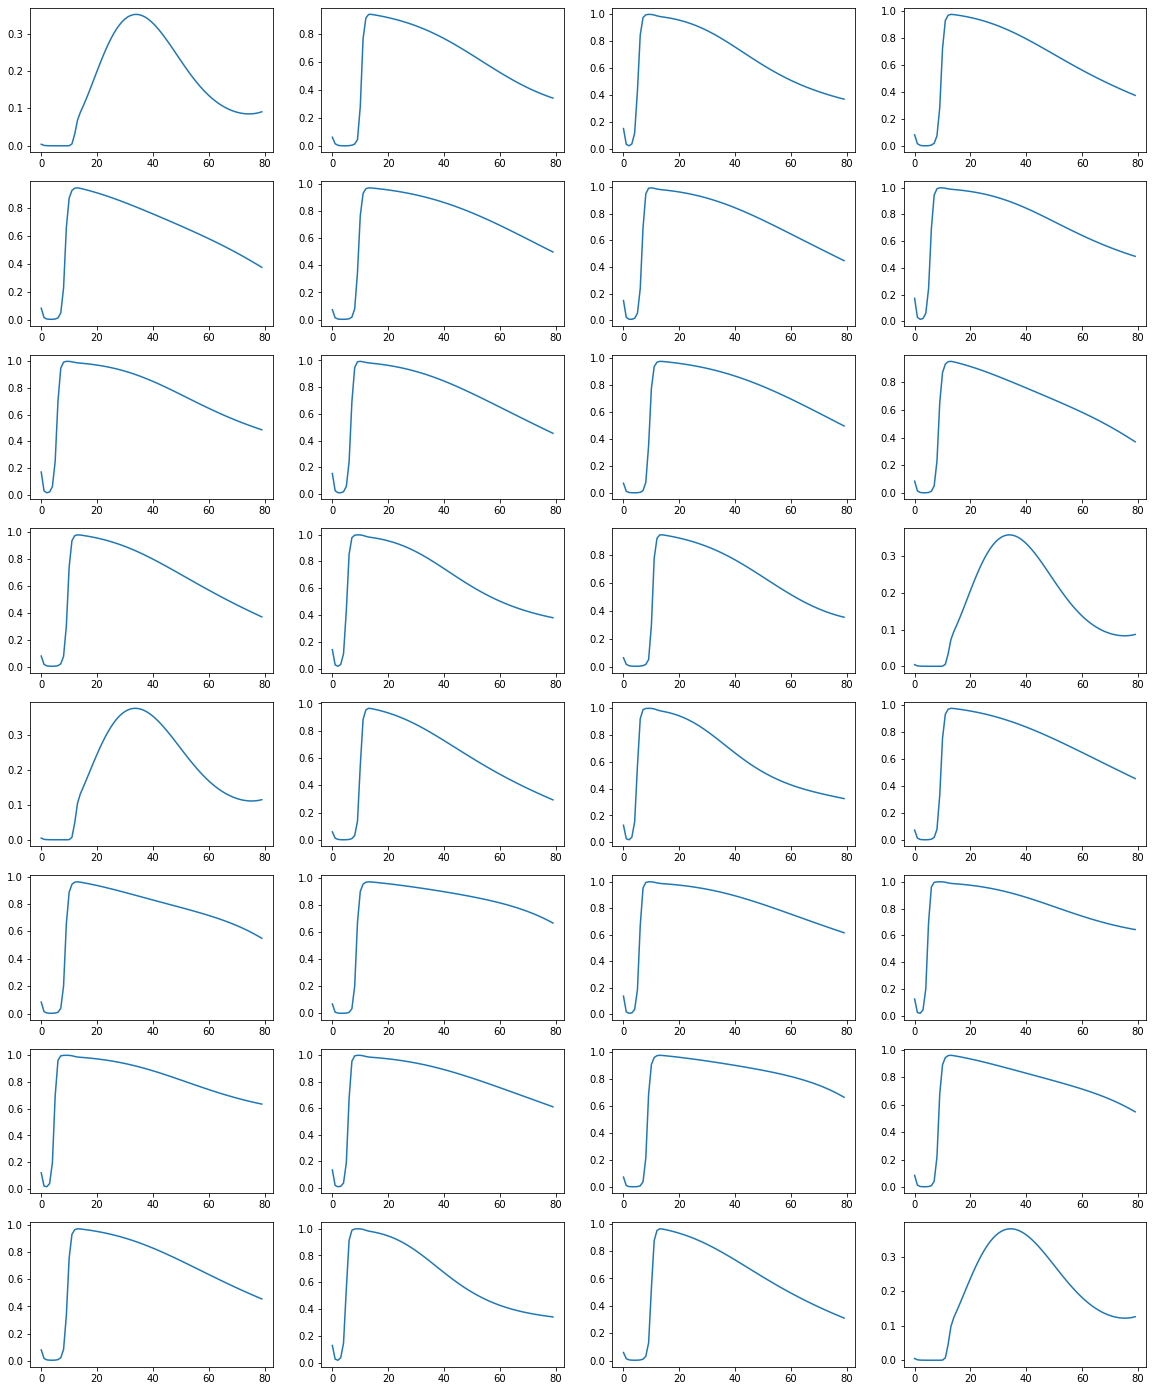

In [37]:
#plot the predicted variable for all the teeth variables
age = [i for i in range(80)]
_tc_ = tc_prob.loc[:, "yhat_01":]

fig, axes = plt.subplots(8,4)
fig.set_size_inches(20, 25)
count = 0
for i in range(8):
    for j in range(4):
        axes[i, j].plot(age, _tc_.iloc[:,count])
        count += 1

## Question 2 - Hosmer-Lemeshow Calibration Plot

##### part a

In [39]:
#divide the dataset into 10 percentiles
tc_selected = tclist[['y_07', 'yhat_07']]
tc_selected['Decile'] = pd.qcut(tc_selected['yhat_07'], 10, labels=False)

##### part b

In [51]:
#obtain the mean for predicted data and observed data
tc_mean = tc_selected.groupby('Decile').mean()
tc_mean

<ipython-input-51-3893006811ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc_selected['Decile'] = pd.qcut(tc_selected['yhat_07'], 10, labels=False)


,y_07,yhat_07
Decile,,
0,0.009946,0.022211
1,0.277372,0.302979
2,0.549706,0.542785
3,0.687845,0.659830
4,0.763285,0.734819
5,0.847029,0.821592
6,0.899918,0.900020
7,0.932987,0.949117
8,0.966167,0.973597


##### part c

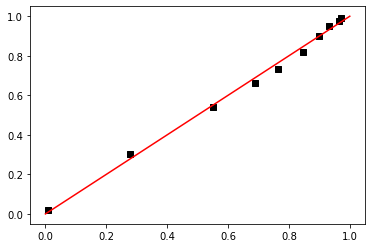

In [76]:
#plot the calibration with slope = 1
fig2, ax2 = plt.subplots(nrows=1, ncols=1)
_ = plt.scatter(
    data=tc_mean,
    x='y_07',
    y='yhat_07',
    marker='s',
    color='black'
    )
point1 = [0, 0]
point2 = [1, 1]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color = 'red')

##### part d

The plot looks great with the data. The data points follow the slope of 1 and show a well-calibrated graph. Therefore, we can conclude that the calibration plot is suffciently conclude all the datapoints and show a great linear trend.